# Experiment 1

*Feature Set 1 (Hahne):*
1. Logarithm of the variance (logVAR)

*Feature Set 2 (Hudgins):*
1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

*Feature Set 3 (Phinyomark):*
1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)



## Load Results

First: Import the library developed to visualize the results

In [2]:
import VisualizationFunctions as VF1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load of the DA-based adaptation techniques' results over the three databases (First Research Question).

In [3]:
place='../DA-basedAdaptationTechnique/FewShotLearningEMG/Experiments/Experiment1/ResultsExp1/'

# Nina Pro 5 database
database='NinaPro5'
resultsNinaPro5,timeNinaPro5=VF1.uploadResultsDatabase(place, database)

# Cote-Allard database
database='Cote'
resultsCote,timeCote=VF1.uploadResultsDatabase(place, database)

# EPN database
database='EPN'
resultsEPN,timeEPN=VF1.uploadResultsDatabase(place, database)


### load data

In [4]:
resultsNina5RQ2= pd.read_csv("Nina5_Uns.csv")
resultsCoteRQ2= pd.read_csv("Cote_Uns.csv")
resultsEPNRQ2= pd.read_csv("EPN_Uns.csv")



## One Shot
### LDA

In [5]:
Nina5=resultsNinaPro5['LDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['LDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['LDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ_L'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ_L'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ_L'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()

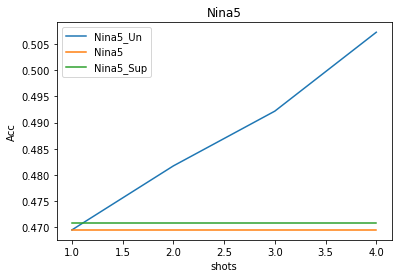

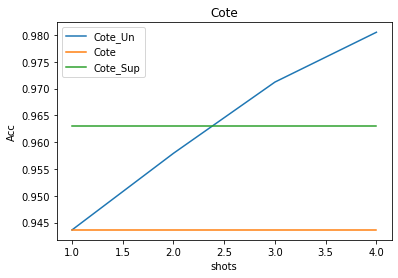

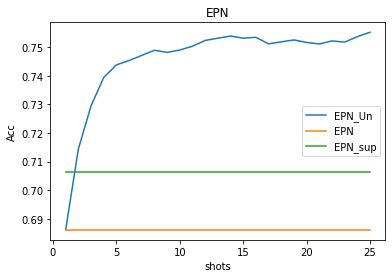

In [6]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccLDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccLDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccLDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccLDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccLDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

shot=1
Nina5=np.ones(4)*Nina5[shot-1]
Cote=np.ones(4)*Cote[shot-1]
EPN=np.ones(25)*EPN[shot-1]

Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
EPN_Prop=np.ones(25)*EPN_Prop[shot-1]


x=[1,2,3,4]
plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x,CoteRQ2,label='Cote_Un')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
plt.plot(x,EPNRQ2,label='EPN_Un')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()






## One Shot
### QDA

In [7]:
Nina5=resultsNinaPro5['QDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['QDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['QDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()


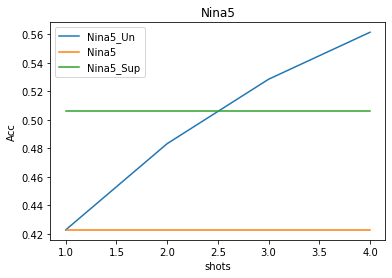

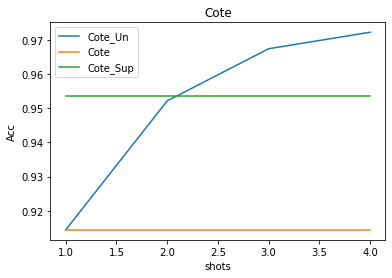

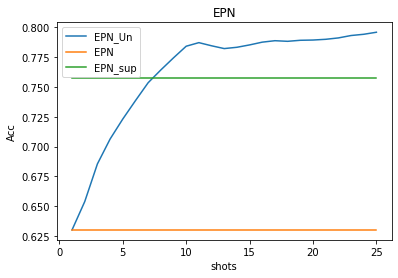

In [8]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccQDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccQDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccQDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccQDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccQDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

shot=1
Nina5=np.ones(4)*Nina5[shot-1]
Cote=np.ones(4)*Cote[shot-1]
EPN=np.ones(25)*EPN[shot-1]

Nina5_Prop=np.ones(4)*Nina5_Prop[shot-1]
Cote_Prop=np.ones(4)*Cote_Prop[shot-1]
EPN_Prop=np.ones(25)*EPN_Prop[shot-1]


x=[1,2,3,4]
plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x,CoteRQ2,label='Cote_Un')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
plt.plot(x,EPNRQ2,label='EPN_Un')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_sup')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()


## Two Shot
### LDA

In [9]:
resultsNina5RQ2_2= pd.read_csv("Nina5_Uns_2Shots.csv")
resultsNina5RQ2= pd.read_csv("Nina5_Uns.csv")
resultsCoteRQ2_2= pd.read_csv("Cote_Uns_2Shots.csv")
resultsCoteRQ2= pd.read_csv("Cote_Uns.csv")
resultsEPNRQ2_2= pd.read_csv("EPN_Uns_2Shots.csv")
resultsEPNRQ2= pd.read_csv("EPN_Uns.csv")

In [10]:
Nina5=resultsNinaPro5['LDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['LDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['LDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ_L'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ_L'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ_L'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()


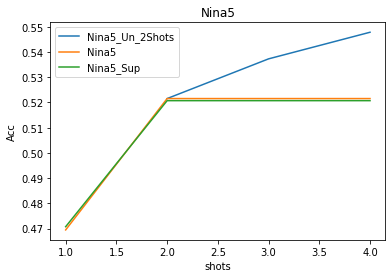

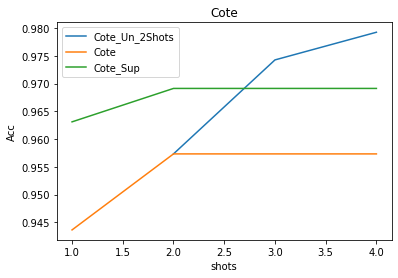

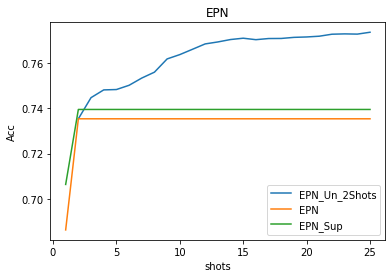

In [11]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccLDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccLDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccLDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccLDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccLDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccLDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()


Nina5RQ2_2=np.zeros(3)
CoteRQ2_2=np.zeros(3)
EPNRQ2_2=np.zeros(24)

Nina5RQ2_2[0]=resultsNina5RQ2_2['AccLDAInd'].loc[resultsNina5RQ2_2['# shots']==1].mean()
CoteRQ2_2[0]=resultsCoteRQ2_2['AccLDAInd'].loc[resultsCoteRQ2_2['# shots']==1].mean()
EPNRQ2_2[0]=resultsEPNRQ2_2['AccLDAInd'].loc[resultsEPNRQ2_2['# shots']==1].mean()


for i in range(1,3):
    Nina5RQ2_2[i]=resultsNina5RQ2_2['AccLDAProp'].loc[resultsNina5RQ2_2['# shots']==i].mean()
    CoteRQ2_2[i]=resultsCoteRQ2_2['AccLDAProp'].loc[resultsCoteRQ2_2['# shots']==i].mean()
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccLDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

for i in range(3,24):
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccLDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

shot=2
Nina5=np.hstack((Nina5[0],np.ones(3)*Nina5[shot-1]))
Cote=np.hstack((Cote[0],np.ones(3)*Cote[shot-1]))
EPN=np.hstack((EPN[0],np.ones(24)*EPN[shot-1]))

Nina5_Prop=np.hstack((Nina5_Prop[0],np.ones(3)*Nina5_Prop[shot-1]))
Cote_Prop=np.hstack((Cote_Prop[0],np.ones(3)*Cote_Prop[shot-1]))
EPN_Prop=np.hstack((EPN_Prop[0],np.ones(24)*EPN_Prop[shot-1]))


x=[1,2,3,4]
x2=[2,3,4]

plt.plot(x2,Nina5RQ2_2,label='Nina5_Un_2Shots')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
# plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x2,CoteRQ2_2,label='Cote_Un_2Shots')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
# plt.plot(x,CoteRQ2,label='Cote_Un')

plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
x2=[*range(2,26)]
plt.plot(x2,EPNRQ2_2,label='EPN_Un_2Shots')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_Sup')
# plt.plot(x,EPNRQ2,label='EPN_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()



## Two Shot
### QDA

In [12]:
Nina5=resultsNinaPro5['QDA_Ind'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote=resultsCote['QDA_Ind'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN=resultsEPN['QDA_Ind'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()
Nina5_Prop=resultsNinaPro5['PropQ'].loc[(resultsNinaPro5['Feature Set']==1)&(resultsNinaPro5['# shots'].isin([1,2,3,4]))].to_numpy()
Cote_Prop=resultsCote['PropQ'].loc[(resultsCote['Feature Set']==1)&(resultsCote['# shots'].isin([1,2,3,4]))].to_numpy()
EPN_Prop=resultsEPN['PropQ'].loc[(resultsEPN['Feature Set']==1)&(resultsEPN['# shots'].isin([*range(1,26)]))].to_numpy()

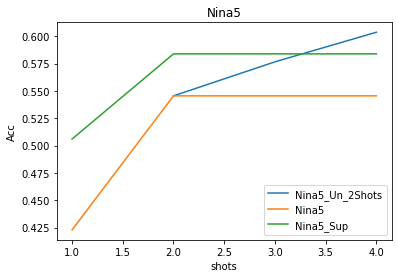

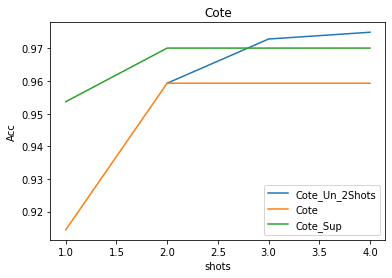

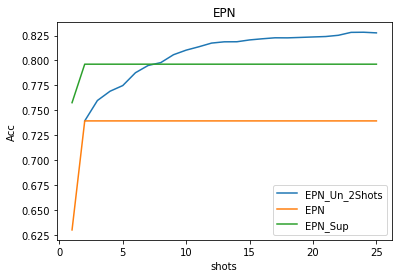

In [13]:
Nina5RQ2=np.zeros(4)
CoteRQ2=np.zeros(4)
EPNRQ2=np.zeros(25)
Nina5RQ2[0]=resultsNina5RQ2['AccQDAInd'].loc[resultsNina5RQ2['# shots']==1].mean()
CoteRQ2[0]=resultsCoteRQ2['AccQDAInd'].loc[resultsCoteRQ2['# shots']==1].mean()
EPNRQ2[0]=resultsEPNRQ2['AccQDAInd'].loc[resultsEPNRQ2['# shots']==1].mean()

for i in range(1,4):
    Nina5RQ2[i]=resultsNina5RQ2['AccQDAProp'].loc[resultsNina5RQ2['# shots']==i].mean()
    CoteRQ2[i]=resultsCoteRQ2['AccQDAProp'].loc[resultsCoteRQ2['# shots']==i].mean()
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

for i in range(4,25):
    EPNRQ2[i]=resultsEPNRQ2['AccQDAProp'].loc[resultsEPNRQ2['# shots']==i].mean()

Nina5RQ2_2=np.zeros(3)
CoteRQ2_2=np.zeros(3)
EPNRQ2_2=np.zeros(24)

Nina5RQ2_2[0]=resultsNina5RQ2_2['AccQDAInd'].loc[resultsNina5RQ2_2['# shots']==1].mean()
CoteRQ2_2[0]=resultsCoteRQ2_2['AccQDAInd'].loc[resultsCoteRQ2_2['# shots']==1].mean()
EPNRQ2_2[0]=resultsEPNRQ2_2['AccQDAInd'].loc[resultsEPNRQ2_2['# shots']==1].mean()


for i in range(1,3):
    Nina5RQ2_2[i]=resultsNina5RQ2_2['AccQDAProp'].loc[resultsNina5RQ2_2['# shots']==i].mean()
    CoteRQ2_2[i]=resultsCoteRQ2_2['AccQDAProp'].loc[resultsCoteRQ2_2['# shots']==i].mean()
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccQDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

for i in range(3,24):
    EPNRQ2_2[i]=resultsEPNRQ2_2['AccQDAProp'].loc[resultsEPNRQ2_2['# shots']==i].mean()

shot=2
Nina5=np.hstack((Nina5[0],np.ones(3)*Nina5[shot-1]))
Cote=np.hstack((Cote[0],np.ones(3)*Cote[shot-1]))
EPN=np.hstack((EPN[0],np.ones(24)*EPN[shot-1]))

Nina5_Prop=np.hstack((Nina5_Prop[0],np.ones(3)*Nina5_Prop[shot-1]))
Cote_Prop=np.hstack((Cote_Prop[0],np.ones(3)*Cote_Prop[shot-1]))
EPN_Prop=np.hstack((EPN_Prop[0],np.ones(24)*EPN_Prop[shot-1]))


x=[1,2,3,4]
x2=[2,3,4]

plt.plot(x2,Nina5RQ2_2,label='Nina5_Un_2Shots')
plt.plot(x,Nina5,label='Nina5')
plt.plot(x,Nina5_Prop,label='Nina5_Sup')
# plt.plot(x,Nina5RQ2,label='Nina5_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Nina5')
plt.legend()
plt.show()

plt.plot(x2,CoteRQ2_2,label='Cote_Un_2Shots')
plt.plot(x,Cote,label='Cote')
plt.plot(x,Cote_Prop,label='Cote_Sup')
# plt.plot(x,CoteRQ2,label='Cote_Un')

plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('Cote')
plt.legend()
plt.show()

x=[*range(1,26)]
x2=[*range(2,26)]
plt.plot(x2,EPNRQ2_2,label='EPN_Un_2Shots')
plt.plot(x,EPN,label='EPN')
plt.plot(x,EPN_Prop,label='EPN_Sup')
# plt.plot(x,EPNRQ2,label='EPN_Un')
plt.xlabel('shots')
plt.ylabel('Acc')
plt.title('EPN')
plt.legend()
plt.show()

